# 第五章
# 文件与IO

In [1]:
with open('somefile.txt', 'rt') as f:
    data = f.read()

In [2]:
data

'this is the 1st line of python\nthis is the 2nd line \nthis is the 3rd line of \nthis is the 4th line\nthis is the 5th line python\n'

In [3]:
import sys
sys.getdefaultencoding()

'utf-8'

In [10]:
with open('somefile.txt', 'wt') as f:
    f.write('haha1\n')
    f.write('hehe2\n')

In [11]:
with open('somefile.txt', 'rt', newline='') as f:
    data = f.read()

In [12]:
data

'haha1\nhehe2\n'

In [16]:
# anotherfile.txt: 哈哈哈\n 呵呵呵
with open('anotherfile.txt', 'rt', encoding='ascii') as f:
    data = f.read()

UnicodeDecodeError: 'ascii' codec can't decode byte 0xe5 in position 0: ordinal not in range(128)

In [18]:
with open('halape0.txt', 'rt', encoding='ascii', errors='replace') as f:
    data = f.read()

In [19]:
data

'spicy halape��0'

In [20]:
with open('halape0.txt', 'rt', encoding='ascii', errors='ignore') as f:
    data = f.read()

In [21]:
data

'spicy halape0'

## 打印输出至文件中

In [22]:
with open('./print_2_file.txt', 'wt') as f:
    print('黑糖话梅', file=f)

## 读写字节数据

In [24]:
with open('somefile.bin', 'wb') as f:
    text = 'Hello World'
    f.write(text.encode('utf-8'))

In [25]:
with open('somefile.bin', 'rb') as f:
    st = f.read()

In [26]:
st

b'Hello World'

In [27]:
st[3]

108

In [28]:
st[3].decode('utf-8')

AttributeError: 'int' object has no attribute 'decode'

In [30]:
st.decode('utf-8')

'Hello World'

### 二进I/O还有一个鲜为人知的特性就是数组C结构体类型能直接被写入，而不需要中间转换为自己对象

In [31]:
import array
nums = array.array('i', [1,2,3,4])
with open('data.bin', 'wb') as f:
    f.write(nums)


In [32]:
nums

array('i', [1, 2, 3, 4])

In [33]:
a = array.array('i', [0,0,0,0,0,0,0,0])
with open('data.bin', 'rb') as f:
    f.readinto(a)

In [34]:
a 

array('i', [1, 2, 3, 4, 0, 0, 0, 0])

## 文件不存在才能写入

In [1]:
with open('somefile.txt', 'xt') as f:
    f.write('Hello from other side')

FileExistsError: [Errno 17] File exists: 'somefile.txt'

In [3]:
import os
if not os.path.exists('somefile.txt'):
    with open('somefile.txt', 'wt') as f:
        f.write('Hello from the other side\n')
else: 
    print('File alreay exists!')

            
    

File alreay exists!


## 字符串的i/o操作

In [4]:
import io
s = io.StringIO()
s.write('hello from the other side')

25

In [5]:
s.getvalue()

'hello from the other side'

In [6]:
s.write('\n')

1

In [7]:
s.getvalue()

'hello from the other side\n'

In [8]:
print('this is a test.\n', file=s)

In [9]:
s.getvalue()

'hello from the other side\nthis is a test.\n\n'

In [11]:
s

In [14]:
s = io.StringIO('hello world')

In [15]:
s.read(4)

'hell'

In [16]:
s.read()

'o world'

In [18]:
s_prime = io.BytesIO()
s_prime.write(b'binary data')
s_prime.getvalue()

b'binary data'

## 读写压缩文件

In [19]:
import gzip
with gzip.open('somefile.gz', 'wt') as f:
    f.write('if you\'re gonna let me down, let me donw gently')

In [20]:
with gzip.open('somefile.gz', 'rt') as f:
    text = f.read()

In [21]:
text

"if you're gonna let me down, let me donw gently"

In [22]:
import bz2
with bz2.open('somefile.bz2', 'wt') as f:
    f.write('don\'t pretend that you don\'t want me')

In [23]:
with bz2.open('somefile.bz2', 'rt') as f:
    text = f.read()

In [24]:
text

"don't pretend that you don't want me"

## 固定大小记录的文件迭代

In [27]:
from functools import partial
RECORD_SIZE = 32
with open('somefile.bin', 'rb') as f:
    records = iter(partial(f.read, RECORD_SIZE), b'')
    for r in records:
        print(r)

b"If you're not the one for me\n\nTh"
b'en how come I can bring you to y'
b"our knees\n\nIf you're not the one"
b' for me\n\nWhy do I hate the idea '
b"of being free\n\nAnd if I'm not th"
b"e one for you\n\nYou've got to sto"
b'p holding me the way you do\n\nOh '
b"honey if I'm not the one for you"
b'\n\nWhy have we been through what '
b"we have been through\n\nIt's so co"
b'ld out here in your wilderness\n\n'
b'I want you to be my keeper\n\nBut '
b'not if you are so reckless\n\nIf y'
b"ou're gonna let me down, let me "
b"down gently\n\nDon't pretend that "
b"you don't want me\n\nOur love ain'"
b't water under the bridge\n\nIf you'
b"'re gonna let me down, let me do"
b"wn gently\n\nDon't pretend that yo"
b"u don't want me\n\nOur love ain't "
b'water under the bridge\n\nWoaah, w'
b"oaaah\n\nSay that our love ain't w"
b'ater under the bridge\n\nWhat are '
b'you waiting for?\n\nYou never seem'
b' to make it through the door\n\nAn'
b'd who are you hiding from?\n\nIt a'
b"in't no life to li

## 读取二进制数据到可变缓冲区中

In [28]:
import os.path
def read_into_buffer(filename):
    buf = bytearray(os.path.getsize(filename))
    with open(filename, 'rb') as f:
        f.readinto(buf)
    return buf



In [29]:
with open('sample.bin', 'wb') as f:
    f.write(b'Hello World')

buf = read_into_buffer('sample.bin')
buf

bytearray(b'Hello World')

In [30]:
buf[:5] = b'Hallo'

In [31]:
buf

bytearray(b'Hallo World')

In [32]:
with open('newsample.bin', 'wb') as f:
    f.write(buf)

In [44]:
record_size =32
buf = bytearray(record_size)
with open('newsample.bin', 'rb') as f:
    while True:
        n = f.readinto(buf)
        if n < record_size:
            break
print(n)

11


In [45]:
buf

bytearray(b'Hallo World\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00')

In [46]:
m1 = memoryview(buf)
m2 = m1[-5:]

In [47]:
m2

In [50]:
m2[:] = b'WORLD'

In [51]:
buf

bytearray(b'Hallo World\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00WORLD')

## 内存映射的二进制文件

In [54]:
import os
import mmap


def memory_map(filename, access = mmap.ACCESS_WRITE):
    size = os.path.getsize(filename)
    fd = os.open(filename, os.O_RDWR)
    return mmap.mmap(fd, size, access=access)


In [55]:
size = 1000000
with open('data', 'wb') as f:
    f.seek(size -1)
    f.write(b'\x00')

In [56]:
m = memory_map('data')
len(m)

1000000

In [57]:
m[:10]

b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'

In [58]:
m[0]

0

In [59]:
m[:11] = b'hello world'
m.close()

In [60]:
with open('data', 'rb') as f:
    print(f.read(11))

b'hello world'


In [63]:
with memory_map('data') as m:
    print(len(m))
    print(m[:30])
    print(m[-5:-1])

1000000
b'hello world\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'
b'\x00\x00\x00\x00'


In [64]:
m.closed

True

## 文件路径名的操作

In [65]:
import os
path = '/Users/joriri/Code/jupyter/data.bin'

os.path.basename(path)


'data.bin'

In [66]:
os.path.dirname(path)

'/Users/joriri/Code/jupyter'

In [67]:
# join path components together
os.path.join('tmp', 'data', os.path.basename(path))

'tmp/data/data.bin'

In [68]:
path = '~/Code'
os.path.expanduser(path)

'/Users/joriri/Code'

In [70]:
# Split the file extension
path = '/Users/joriri/Code/jupyter/data.bin'
li = []
li = os.path.splitext(path)

In [71]:
li

('/Users/joriri/Code/jupyter/data', '.bin')

⬆️ 对于数据集的处理有用

## 测试文件是否存在

In [72]:
import os
os.path.exists('/etc/passwd')

True

In [73]:
os.path.exists('/etc/spam')

False

In [74]:
os.path.isfile('/etc/passwd')

True

In [75]:
os.path.isdir('/etc/passwd')

False

In [79]:
os.path.islink('/usr/local/bin/pdf2ps')

False

In [81]:
os.path.islink('/Users/joriri/opt/anaconda3/share/man/man1/python3.1')

True

In [82]:
os.path.realpath('/Users/joriri/opt/anaconda3/share/man/man1/python3.1')

'/Users/joriri/opt/anaconda3/share/man/man1/python3.9.1'

In [83]:
os.path.getsize('/etc/passwd')

8160

In [84]:
os.path.getmtime('/etc/passwd')


1675935593.0

In [85]:
import time
time.ctime(os.path.getmtime('/etc/passwd'))

'Thu Feb  9 17:39:53 2023'

## 获取文件夹中的文件列表

In [86]:
names = os.listdir('../')

In [87]:
names

['demo',
 'latex_test',
 'desc_parser.py',
 'AHUThesis-master',
 '.DS_Store',
 'ambition.txt',
 'ply_parser.py',
 'trans_rgb',
 'parsetab.py',
 'parser.out',
 'img',
 'spider_book',
 'some_python',
 'ch_recognition.py',
 'git_practice',
 'DL',
 '.vscode',
 'jupyter']

In [88]:
len(names)

18

In [89]:
# get all regular files
names = [name for name in os.listdir('../')
         if os.path.isfile(os.path.join('../', name))]

In [90]:
names

['desc_parser.py',
 '.DS_Store',
 'ambition.txt',
 'ply_parser.py',
 'parsetab.py',
 'parser.out',
 'ch_recognition.py']

In [91]:
# get all dirs
dirnames = [name for name in os.listdir('../')
            if os.path.isdir(os.path.join('../', name))]

In [92]:
dirnames

['demo',
 'latex_test',
 'AHUThesis-master',
 'trans_rgb',
 'img',
 'spider_book',
 'some_python',
 'git_practice',
 'DL',
 '.vscode',
 'jupyter']

In [93]:
# sting.startswith string.endswith
pyfiles = [name for name in os.listdir('../')
           if name.endswith('.py')]

In [94]:
pyfiles

['desc_parser.py', 'ply_parser.py', 'parsetab.py', 'ch_recognition.py']

In [96]:
# 对于文件名的匹配，可以使用glob或者fnmatch
import glob
pyfiles = glob.glob('../*.py')

In [97]:
pyfiles

['../desc_parser.py',
 '../ply_parser.py',
 '../parsetab.py',
 '../ch_recognition.py']

In [98]:
from fnmatch import fnmatch
pyfiles = [name for name in os.listdir('../')
           if fnmatch(name, '*.py')]

In [99]:
pyfiles

['desc_parser.py', 'ply_parser.py', 'parsetab.py', 'ch_recognition.py']

In [100]:
# 获得一些文件的其他信息
import os
import os.path
import glob


pyfiles = glob.glob('../*.py')

# get file sizes and mofification dates
name_sz_date = [(name, os.path.getsize(name), os.path.getmtime(name))
                for name in pyfiles]

In [102]:
name_sz_date

[('../desc_parser.py', 3277, 1688449845.3543172),
 ('../ply_parser.py', 1480, 1688453479.8070745),
 ('../parsetab.py', 2039, 1688453484.5836527),
 ('../ch_recognition.py', 315, 1686577296.5326047)]

In [103]:
# Alternative: Get file metadata
file_metadata = [(name, os.stat(name)) for name in pyfiles]

In [104]:
file_metadata

[('../desc_parser.py',
  os.stat_result(st_mode=33188, st_ino=12289587, st_dev=16777232, st_nlink=1, st_uid=501, st_gid=20, st_size=3277, st_atime=1688449915, st_mtime=1688449845, st_ctime=1688449845)),
 ('../ply_parser.py',
  os.stat_result(st_mode=33188, st_ino=12306244, st_dev=16777232, st_nlink=1, st_uid=501, st_gid=20, st_size=1480, st_atime=1688453481, st_mtime=1688453479, st_ctime=1688453479)),
 ('../parsetab.py',
  os.stat_result(st_mode=33188, st_ino=12306261, st_dev=16777232, st_nlink=1, st_uid=501, st_gid=20, st_size=2039, st_atime=1688453486, st_mtime=1688453484, st_ctime=1688453484)),
 ('../ch_recognition.py',
  os.stat_result(st_mode=33188, st_ino=10853729, st_dev=16777232, st_nlink=1, st_uid=501, st_gid=20, st_size=315, st_atime=1687247638, st_mtime=1686577296, st_ctime=1687247636))]

## 忽略文件名编码

In [105]:
import sys
sys.getfilesystemencoding()

'utf-8'

In [106]:
# write a file using a unicode filename
with open('halape\xf1o.txt', 'w') as f:
    f.write('Spicy!')

In [107]:
# after decoding
os.listdir('.')

['print_2_file.txt',
 'linear.csv',
 'sorted_file_2',
 'newsample.bin',
 'somefile.bin',
 '.DS_Store',
 'somefile.txt',
 'plot_demo1.png',
 '用vscode写jupyter.ipynb',
 'python_cookbook_1_to_4.ipynb',
 'anotherfile.txt',
 'lines.txt',
 '230513_用iris来初入门jupyter.ipynb',
 'sort_heapq.py',
 'halapeño.txt',
 'somefile.bz2',
 'halape0.txt',
 'sorted_file_1',
 'python_cookbook_5_to_7.ipynb',
 'yield_from_flatten.py',
 'data_mining_numpy.ipynb',
 '.ipynb_checkpoints',
 'data_mining_matplotlib.ipynb',
 'merged_file',
 'somefile.gz',
 'data',
 'data.bin',
 'sample.bin']

In [108]:
# raw
os.listdir(b'.')

[b'print_2_file.txt',
 b'linear.csv',
 b'sorted_file_2',
 b'newsample.bin',
 b'somefile.bin',
 b'.DS_Store',
 b'somefile.txt',
 b'plot_demo1.png',
 b'\xe7\x94\xa8vscode\xe5\x86\x99jupyter.ipynb',
 b'python_cookbook_1_to_4.ipynb',
 b'anotherfile.txt',
 b'lines.txt',
 b'230513_\xe7\x94\xa8iris\xe6\x9d\xa5\xe5\x88\x9d\xe5\x85\xa5\xe9\x97\xa8jupyter.ipynb',
 b'sort_heapq.py',
 b'halape\xc3\xb1o.txt',
 b'somefile.bz2',
 b'halape0.txt',
 b'sorted_file_1',
 b'python_cookbook_5_to_7.ipynb',
 b'yield_from_flatten.py',
 b'data_mining_numpy.ipynb',
 b'.ipynb_checkpoints',
 b'data_mining_matplotlib.ipynb',
 b'merged_file',
 b'somefile.gz',
 b'data',
 b'data.bin',
 b'sample.bin']

## 打印不合法的文件名

In [109]:
def bad_filename(filename):
    return repr(filename)[1:-1]

try: 
    print(filename)
except UnicodeEncodeError:
    print(bad_filename(filename))

NameError: name 'filename' is not defined

In [129]:
import string
s = 'b\udce4d'
s.encode(encoding='latin-1')
s.decode('latin-1')

UnicodeEncodeError: 'latin-1' codec can't encode character '\udce4' in position 1: ordinal not in range(256)

In [123]:
files = os.listdir('.')

In [124]:
files

['print_2_file.txt',
 'linear.csv',
 'sorted_file_2',
 'newsample.bin',
 'somefile.bin',
 '.DS_Store',
 'somefile.txt',
 'plot_demo1.png',
 '用vscode写jupyter.ipynb',
 'python_cookbook_1_to_4.ipynb',
 'anotherfile.txt',
 'lines.txt',
 '230513_用iris来初入门jupyter.ipynb',
 'sort_heapq.py',
 'halapeño.txt',
 'somefile.bz2',
 'halape0.txt',
 'sorted_file_1',
 'python_cookbook_5_to_7.ipynb',
 'yield_from_flatten.py',
 'data_mining_numpy.ipynb',
 '.ipynb_checkpoints',
 'data_mining_matplotlib.ipynb',
 'bäd.txt',
 'merged_file',
 'somefile.gz',
 'data',
 'data.bin',
 'sample.bin']

In [125]:
for name in files:
    print(name)

print_2_file.txt
linear.csv
sorted_file_2
newsample.bin
somefile.bin
.DS_Store
somefile.txt
plot_demo1.png
用vscode写jupyter.ipynb
python_cookbook_1_to_4.ipynb
anotherfile.txt
lines.txt
230513_用iris来初入门jupyter.ipynb
sort_heapq.py
halapeño.txt
somefile.bz2
halape0.txt
sorted_file_1
python_cookbook_5_to_7.ipynb
yield_from_flatten.py
data_mining_numpy.ipynb
.ipynb_checkpoints
data_mining_matplotlib.ipynb
bäd.txt
merged_file
somefile.gz
data
data.bin
sample.bin


In [130]:
s2 = 'Spicy Jalapen\u0303o'

In [131]:
s2

'Spicy Jalapeño'

## 增加或改变已打开文件的编码

In [142]:
import urllib.request
import io

u = urllib.request.urlopen('http://www.python.org')
f= io.TextIOWrapper(u, encoding='utf-8')
text = f.read()

In [143]:
text

'<!doctype html>\n<!--[if lt IE 7]>   <html class="no-js ie6 lt-ie7 lt-ie8 lt-ie9">   <![endif]-->\n<!--[if IE 7]>      <html class="no-js ie7 lt-ie8 lt-ie9">          <![endif]-->\n<!--[if IE 8]>      <html class="no-js ie8 lt-ie9">                 <![endif]-->\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" dir="ltr">  <!--<![endif]-->\n\n<head>\n    <!-- Google tag (gtag.js) -->\n    <script async src="https://www.googletagmanager.com/gtag/js?id=G-TF35YF9CVH"></script>\n    <script>\n      window.dataLayer = window.dataLayer || [];\n      function gtag(){dataLayer.push(arguments);}\n      gtag(\'js\', new Date());\n      gtag(\'config\', \'G-TF35YF9CVH\');\n    </script>\n\n    <meta charset="utf-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n    <link rel="prefetch" href="//ajax.googleapis.com/ajax/libs/jquery/1.8.2/jquery.min.js">\n    <link rel="prefetch" href="//ajax.googleapis.com/ajax/libs/jqueryui/1.12.1/jquery-ui.min.js">\n\n    <meta name="applicatio

In [144]:
import sys
sys.stdout.encoding

'UTF-8'

In [145]:
sys.stdout = io.TextIOWrapper(sys.stdout.detach(), encoding='latin-1')

UnsupportedOperation: detach

将在vscode中演示

## 将字节写入文本文件

In [146]:
import sys
sys.stdout.write(b'hello\n')

TypeError: write() argument must be str, not <class 'bytes'>

In [149]:
# 在vscode中可行
sys.stdout.buffer.write(b'hello\n')

AttributeError: 'OutStream' object has no attribute 'buffer'

## 将文件描述符包装成文件对象

In [150]:
import os
# open a low-level file descriptor
fd = os.open('somefile.txt', os.O_WRONLY | os.O_CREAT)

# turn into a proper file
f = open(fd, 'wt')
f.write('hello from the other side\n')
f.close()

In [153]:
# 仅适用于基于Unix的系统， 可移植性不好
from socket import socket, AF_INET, SOCK_STREAM

def echo_client(client_sock, addr):
    print('Got connection from ', addr)
    
    # make text-mode file wrappers for socket reading/writing
    client_in = open(client_sock.fileno(), 'rt', encoding='latin-1', closed=False)
    client_out = open(client_sock.fileno(), 'wt', encoding='latin-1', closefd=False)
    
    # Echo lines back to the client using file I/O
    for line in client_in:
        client_out.write(line)
        client_out.flush()
    client_sock.close()
    
def echo_server(address):
    sock = socket(AF_INET, SOCK_STREAM)
    sock.bind(address)
    sock.listen(1)
    while True:
        client, addr = sock.accept()
        echo_client(client, addr)

In [154]:
# create a binary-mode file for stdout
bstdout = open(sys.stdout.fileno(), 'wb', closefd=False)
bstdout.write(b'Hello World')
bstdout.flush()

In [155]:
bstdout

<_io.BufferedWriter name=56>

In [156]:
bstdout.closed

False

In [157]:
bstdout.close()

In [158]:
bstdout.closed

True

## 创建临时文件和文件夹

In [159]:
from tempfile import TemporaryFile

with TemporaryFile('w+t') as f:
    # Read/write to the file
    f.write('hello world\n')
    f.write('testing\n')
    
    # Seek back to beginning and read the data
    f.seek(0)
    data = f.read()

In [160]:
data

'hello world\ntesting\n'

In [161]:
from tempfile import NamedTemporaryFile
with NamedTemporaryFile('w+t') as f:
    print(f'file name: {f.name}')
    

file name: /var/folders/x8/t__p3dnn0fbdd76k016s5c540000gn/T/tmp0u2gedpz


In [162]:
with NamedTemporaryFile('w+t', delete=False) as f:
    print(f'file name: {f.name}')

file name: /var/folders/x8/t__p3dnn0fbdd76k016s5c540000gn/T/tmp8p52xupd


In [163]:
from tempfile import TemporaryDirectory

with TemporaryDirectory() as dirname:
    print(f'dirname: {dirname}')

dirname: /var/folders/x8/t__p3dnn0fbdd76k016s5c540000gn/T/tmpzmc20scl


In [164]:
tempfile.gettempdir()

NameError: name 'tempfile' is not defined

In [165]:
import tempfile
tempfile.gettempdir()

'/var/folders/x8/t__p3dnn0fbdd76k016s5c540000gn/T'

In [166]:
# 自定义命名
f = NamedTemporaryFile(prefix='Mymymy', suffix='.txt', dir='/tmp')

In [167]:
f.name

'/tmp/Mymymyw2opq1h2.txt'

In [168]:
f.close()

## 与串行端口的数据通信

In [169]:
# ......

## 序列化python对象

In [ ]:
import pickle

data = ... # some python object
f = open('somefile', 'wb')
pickle.dump(data, f)

# restore from a file
f = open('somefile', 'rb')
data = pickle.load(f)

# restore from a string
data = pickle.loadss(s)


# don't execute

pickle 是一种Python 特有的自描述的数据编码。通过自描述，被序列化后的数据包含每个对象开始和结束以及它的类型信息。因此，你无需担心对象记录的定义，它总是能工作

In [170]:
import pickle
f = open('somedata', 'wb')
pickle.dump([1,2,3,4], f)
pickle.dump('hello', f)
pickle.dump({'apple', 'banana', 'orange'},f)
f.close()


In [171]:
f = open('somedata', 'rb')
pickle.load(f)

[1, 2, 3, 4]

In [172]:
pickle.load(f)

'hello'

In [173]:
pickle.load(f)

{'apple', 'banana', 'orange'}

In [174]:
pickle.load(f)

EOFError: Ran out of input

In [175]:
# 定义一个线程但仍然可以序列化和反序列化
# countdown.py
import time
import threading


class Countdown:
    def __init__(self, n):
        self.n = n
        self.thr = threading.Thread(target= self.run)
        self.thr.daemon = True
        self.thr. start()
        
    def run(self):
        while self.n > 0:
            print('T-minus', self.n)
            self.n -=1
            time.sleep(5)
        
    def __getstate__(self):
        return self.n
    
    def __setstate__(self):
        self.__init__(n)

In [176]:
import countdown

c = countdown.Countdown(30)

T-minus 30


In [177]:
f = open('cstate.p', 'wb')
import pickle
pickle.dump(c, f)
f.close()

In [178]:
f = open('cstate.p', 'rb')
pickle.load(f)

T-minus 23


T-minus 19
T-minus 22
T-minus 18
T-minus 21
T-minus 17
T-minus 20
T-minus 16
T-minus 19
T-minus 15
T-minus 18
T-minus 14
T-minus 17
T-minus 13
T-minus 16
T-minus 12
T-minus 15
T-minus 11
T-minus 14
T-minus 10
T-minus 13
T-minus 9
T-minus 12
T-minus 8
T-minus 11
T-minus 7
T-minus 10
T-minus 6
T-minus 9
T-minus 5
T-minus 8
T-minus 4
T-minus 7
T-minus 3
T-minus 6
T-minus 2
T-minus 5
T-minus 1
T-minus 4
T-minus 3
T-minus 2
T-minus 1


# 第六章
# 数据编码和处理

## 读写csv文件

In [181]:
import csv 
with open('stocks.csv') as f:
    f_csv = csv.reader(f)
    headers = next(f_csv)
    for row in f_csv:
        print(row)
        print(type(row))

['AA', '39.48', '6/11/2007', '9:36am', '-0.18', '181800']
<class 'list'>
['AIG', '71.38', '6/11/2007', '9:36am', '-0.15', '195500']
<class 'list'>
['AXP', '62.58', '6/11/2007', '9:36am', '-0.46', '935000']
<class 'list'>
['BA', '98.31', '6/11/2007', '9:36am', '+0.12', '104800']
<class 'list'>
['C', '53.08', '6/11/2007', '9:36am', '-0.25', '360900']
<class 'list'>
['CAT', '78.29', '6/11/2007', '9:36am', '-0.23', '225400']
<class 'list'>


In [185]:
from collections import namedtuple

with open('stocks.csv') as f:
    f_csv = csv.reader(f)
    headings = next(f_csv)
    Row = namedtuple('Row', headings)
    ss = set()
    for r in f_csv:
        row = Row(*r)
        ss.add(row)
        print(row.Date, row.Price)

6/11/2007 39.48
6/11/2007 71.38
6/11/2007 62.58
6/11/2007 98.31
6/11/2007 53.08
6/11/2007 78.29


In [186]:
ss 

{Row(Symbol='AA', Price='39.48', Date='6/11/2007', Time='9:36am', Change='-0.18', Volume='181800'),
 Row(Symbol='AIG', Price='71.38', Date='6/11/2007', Time='9:36am', Change='-0.15', Volume='195500'),
 Row(Symbol='AXP', Price='62.58', Date='6/11/2007', Time='9:36am', Change='-0.46', Volume='935000'),
 Row(Symbol='BA', Price='98.31', Date='6/11/2007', Time='9:36am', Change='+0.12', Volume='104800'),
 Row(Symbol='C', Price='53.08', Date='6/11/2007', Time='9:36am', Change='-0.25', Volume='360900'),
 Row(Symbol='CAT', Price='78.29', Date='6/11/2007', Time='9:36am', Change='-0.23', Volume='225400')}

In [187]:
# 使用dictreader
with open('stocks.csv') as f:
    f_csv = csv.DictReader(f)
    for row in f_csv:
        print(row)

{'Symbol': 'AA', 'Price': '39.48', 'Date': '6/11/2007', 'Time': '9:36am', 'Change': '-0.18', 'Volume': '181800'}
{'Symbol': 'AIG', 'Price': '71.38', 'Date': '6/11/2007', 'Time': '9:36am', 'Change': '-0.15', 'Volume': '195500'}
{'Symbol': 'AXP', 'Price': '62.58', 'Date': '6/11/2007', 'Time': '9:36am', 'Change': '-0.46', 'Volume': '935000'}
{'Symbol': 'BA', 'Price': '98.31', 'Date': '6/11/2007', 'Time': '9:36am', 'Change': '+0.12', 'Volume': '104800'}
{'Symbol': 'C', 'Price': '53.08', 'Date': '6/11/2007', 'Time': '9:36am', 'Change': '-0.25', 'Volume': '360900'}
{'Symbol': 'CAT', 'Price': '78.29', 'Date': '6/11/2007', 'Time': '9:36am', 'Change': '-0.23', 'Volume': '225400'}


### 写csv文件

In [189]:
headers = ['Symbol','Price','Date','Time','Change','Volume']
rows = [('AA', 39.48, '6/11/2007', '9:36am', -0.18, 181800),
('AIG', 71.38, '6/11/2007', '9:36am', -0.15, 195500),
('AXP', 62.58, '6/11/2007', '9:36am', -0.46, 935000),
]

with open('another_stocks.csv', 'w') as f:
    f_csv = csv.writer(f)
    f_csv.writerow(headers)
    f_csv.writerows(rows)    

In [190]:
# 对于字典序列的数据
headers = ['Symbol', 'Price', 'Date', 'Time', 'Change', 'Volume']
rows = [{'Symbol':'AA', 'Price':39.48, 'Date':'6/11/2007',
'Time':'9:36am', 'Change':-0.18, 'Volume':181800},
{'Symbol':'AIG', 'Price': 71.38, 'Date':'6/11/2007',
'Time':'9:36am', 'Change':-0.15, 'Volume': 195500},
{'Symbol':'AXP', 'Price': 62.58, 'Date':'6/11/2007',
'Time':'9:36am', 'Change':-0.46, 'Volume': 935000},]

with open('other_stocks.csv', 'w') as f:
    f_csv = csv.DictWriter(f, headers)
    f_csv.writeheader()
    f_csv.writerows(rows)

### 分隔符不是逗号是tab

In [ ]:
# Example of reading tab-separated values
with open('stock.csv') as f:
f_tsv = csv.reader(f, delimiter='\t')
for row in f_tsv:
# Process row
...

### 字段名含有非法字符

In [194]:
# 列名合法性认证
# 我把文件中的'time‘ 改成了 ’åime'。原本代码是换成下划线的，但会报错，所以我设置成丢弃
import re

with open('stocks.csv') as f:
    f_csv = csv.reader(f)
    headers = [re.sub('[^a-zA-Z]', '', h) for h in next(f_csv)]
    Row = namedtuple('Row', headers)
    for r in f_csv:
        row = Row(*r)
        print(row)

Row(Symbol='AA', Price='39.48', Date='6/11/2007', ime='9:36am', Change='-0.18', Volume='181800')
Row(Symbol='AIG', Price='71.38', Date='6/11/2007', ime='9:36am', Change='-0.15', Volume='195500')
Row(Symbol='AXP', Price='62.58', Date='6/11/2007', ime='9:36am', Change='-0.46', Volume='935000')
Row(Symbol='BA', Price='98.31', Date='6/11/2007', ime='9:36am', Change='+0.12', Volume='104800')
Row(Symbol='C', Price='53.08', Date='6/11/2007', ime='9:36am', Change='-0.25', Volume='360900')
Row(Symbol='CAT', Price='78.29', Date='6/11/2007', ime='9:36am', Change='-0.23', Volume='225400')


### 转换格式

In [195]:
# csv所产生的数据都是字符串，需手动转换格式

col_type = [str, float, str, str, float, int]
with open('stocks.csv') as f:
    f_csv = csv.reader(f)
    headers = next(f_csv)
    for row in f_csv:
        # Apply conversions to the row items
        row = tuple(convert(value) for convert, value in zip(col_type, row))
        print(row)

('AA', 39.48, '6/11/2007', '9:36am', -0.18, 181800)
('AIG', 71.38, '6/11/2007', '9:36am', -0.15, 195500)
('AXP', 62.58, '6/11/2007', '9:36am', -0.46, 935000)
('BA', 98.31, '6/11/2007', '9:36am', 0.12, 104800)
('C', 53.08, '6/11/2007', '9:36am', -0.25, 360900)
('CAT', 78.29, '6/11/2007', '9:36am', -0.23, 225400)


In [197]:
# 转换字典
field_type = [('Price', float),
             ('Change', float),
             ('Volume', int)]

with open('stocks.csv') as f:
    for row in csv.DictReader(f):
        row.update((key, conversion(row[key])) for key, conversion
                   in field_type)
        print(row)
        

{'Symbol': 'AA', 'Price': 39.48, 'Date': '6/11/2007', 'time': '9:36am', 'Change': -0.18, 'Volume': 181800}
{'Symbol': 'AIG', 'Price': 71.38, 'Date': '6/11/2007', 'time': '9:36am', 'Change': -0.15, 'Volume': 195500}
{'Symbol': 'AXP', 'Price': 62.58, 'Date': '6/11/2007', 'time': '9:36am', 'Change': -0.46, 'Volume': 935000}
{'Symbol': 'BA', 'Price': 98.31, 'Date': '6/11/2007', 'time': '9:36am', 'Change': 0.12, 'Volume': 104800}
{'Symbol': 'C', 'Price': 53.08, 'Date': '6/11/2007', 'time': '9:36am', 'Change': -0.25, 'Volume': 360900}
{'Symbol': 'CAT', 'Price': 78.29, 'Date': '6/11/2007', 'time': '9:36am', 'Change': -0.23, 'Volume': 225400}


## 读写json文件

### json.dumps    &     json.loads     --> str
### json.dump     &    json.load   --> file

In [1]:
import json

In [2]:
data = { 
    'name': 'ACME',
    'shares': 100,
    'price': 542.3}

json_str = json.dumps(data)

In [3]:
json_str

'{"name": "ACME", "shares": 100, "price": 542.3}'

In [4]:
type(json_str)

str

In [5]:
with open('data.json', 'w') as f:
    json.dump(data,f)


In [7]:
from urllib.request import urlopen
import json
from pprint import pprint

u= urlopen('http://search.twitter.com/search.json?q=python&rpp=5')
resp = json.loads(u.read().decode('utf-8'))
pprint(resp)

HTTPError: HTTP Error 410: Gone

In [1]:
# 将JSON字典转化为python对象
class JSONObject:
    def __init__(self, d):
        self.__dict__ = d

In [2]:
import json


s = '{"name": "ACME", "shares": 50, "price": 490.1}'
data = json.loads(s, object_hook=JSONObject)

In [3]:
type(data)

__main__.JSONObject

In [4]:
data.name

'ACME'

In [5]:
print(data)

In [7]:
print(json.dumps(data))

TypeError: Object of type JSONObject is not JSON serializable

In [9]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

In [8]:
def serialize_instance(obj):
    d = {'__classname__' : type(obj).__name__}
    d.update(vars(obj))
    return d


In [10]:
# Dictionary mapping names to known classes
classes = {'Point': Point}

def unserialize_object(d):
    clsname = d.pop('__classname__', None)
    if clsname:
        cls = classes[clsname]
        obj = cls.__new__(cls)     # Make instance without calling __init__
        for key, value in d.items():
            setattr(obj, key, value)
            return obj
    else:
        return d

In [11]:
p = Point(2,3)
s = json.dumps(p, default=serialize_instance)

In [12]:
s 

'{"__classname__": "Point", "x": 2, "y": 3}'

In [16]:
type(s)

str

In [17]:
a = json.loads(s, object_hook=unserialize_object)

In [18]:
a

In [19]:
a.x

2

## 解析简单的xml数据

In [22]:
from urllib.request import urlopen
from xml.etree.ElementTree import parse


# Downlaod the RSS feed and parse it 
u = urlopen('http://planet.python.org/rss20.xml')
doc = parse(u)

# Extract and output tags of interest 
for item in doc.iterfind('channel/item'):
    title = item.findtext('title')
    date = item.findtext('pubDate')
    link = item.findtext('link')
    
    print(title)
    print(date)
    print(link)
    print('-'*10)

John Cook: Searching for proper nouns
Mon, 17 Jul 2023 21:03:33 +0000
https://www.johndcook.com/blog/2023/07/17/searching-for-proper-nouns/
----------
Test and Code: Open Source at Intel
Mon, 17 Jul 2023 16:35:18 +0000
https://share.transistor.fm/s/d56d8bef
----------
Python Morsels: Python's "next" function
Mon, 17 Jul 2023 15:00:00 +0000
https://www.pythonmorsels.com/next/
----------
Real Python: Python News: What's New From June 2023
Mon, 17 Jul 2023 14:00:00 +0000
https://realpython.com/python-news-june-2023/
----------
Mike Driscoll: PyDev of the Week:  Sophia Yang
Mon, 17 Jul 2023 12:45:39 +0000
https://www.blog.pythonlibrary.org/2023/07/17/pydev-of-the-week-sophia-yang/
----------
Matt Layman: Announcing luatest: A Lua test runner inspired by pytest
Mon, 17 Jul 2023 00:00:00 +0000
https://www.mattlayman.com/blog/2023/announcing-luatest/
----------
William Minchin: u202307152242
Sun, 16 Jul 2023 04:42:00 +0000
https://blog.minchin.ca/2023/07/u202307152242.html
----------
death an

## 增量式解析大型xml文件

In [23]:
li = ['a', 'b', 'c']
ss = iter(li)
next(ss)

'a'

In [24]:
next(ss)

'b'

In [25]:
next(ss)

'c'

In [26]:
li.append('z')

In [27]:
next(ss)

'z'

In [30]:
from xml.etree.ElementTree import iterparse

In [32]:
def parse_and_remove(filename, path):
    path_parts = path.split('/')
    doc = iterparse(filename, ('start', 'end'))
    # Skip the root element
    next(doc)
    
    tag_stack = []
    elem_stack = []
    for event, elem in doc:
        if event == 'start':
            tag_stack.append(elem.tag)
            elem_stack.append(elem)
        elif event == 'end':
            if tag_stack == path_parts:
                yield elem
                elem_stack[-2].remove(elem)
            try: 
                tag_stack.pop()
                elem_stack.pop()
            except IndexError:
                pass

## 将字典转换为xml

In [33]:
from xml.etree.ElementTree import Element

def dict_to_xml(tag, d):
    '''
    Turn a simple dict of key/value pairs into XML
    '''
    elem = Element(tag)
    for key, val in d.items():
        child = Element(key)
        child.text = str(val)
        elem.append(child)
    return elem

s = { 'name': 'GOOG', 'shares': 100, 'price':490.1 }
e = dict_to_xml('stock', s)

In [34]:
e

<Element 'stock' at 0x7f9f9a28e9f0>

In [35]:
from xml.etree.ElementTree import tostring

tostring(e)

b'<stock><name>GOOG</name><shares>100</shares><price>490.1</price></stock>'

In [36]:
# 给元素添加属性值
e.set('_id', '9526')

In [37]:
tostring(e)

b'<stock _id="9526"><name>GOOG</name><shares>100</shares><price>490.1</price></stock>'

In [42]:
# xml 只限构造str类型的值
def dict_to_xml_str(tag, d):
    '''
    Turn a simple dict of key/value pairs into XML
    '''
    parts = ['<{}>'.format(tag)]
    for key, val in d.items():
        parts.append('<{0}>{1}</{0}>'.format(key, val))
    parts.append('</{}>'.format(tag))
    return ''.join(parts)

In [43]:
d = {'name': '<spam>'}
dict_to_xml_str('item', d)

'<item><name><spam></name></item>'

In [44]:
# It's problomatic in case above
# Proper XML creation
e = dict_to_xml('item', d)

In [45]:
tostring(e)

b'<item><name>&lt;spam&gt;</name></item>'

In [46]:
from xml.sax.saxutils import escape, unescape
escape('<spam>')

'&lt;spam&gt;'

In [47]:
unescape(_)

'<spam>'

In [48]:
unescape('&lt;spam&gt;')

'<spam>'

## 解析和修改XML

In [50]:
# 读取一个XML文档，对其修改并将结果写回
from xml.etree.ElementTree import parse, Element

doc = parse('/Users/joriri/Code/jupyter/cartoon.xml')
root = doc.getroot()

In [51]:
root

<Element 'families' at 0x7f9f9a355130>

In [59]:
# romove a few elements
# root.remove(root.find('family1'))
# root.remove(root.find('Peter'))

# Insert a new element after <members> ... </members>
list(root)

[<Element 'family2' at 0x7f9f99f26090>]

In [61]:
list(root).index(root.find('family2'))

0

In [62]:
e = Element('spam')
e.text = 'This is a test'
root.insert(1,e)

In [63]:
doc.write('new_cartoon.xml', xml_declaration=True)

## 利用命名空间解析XML文档

xmlns（XML Namespaces的缩写）是一个属性，是XML（标准通用标记语言的子集）命名空间。作用是赋予命名空间一个唯一的名称。

#ns2.xml
<?xml version="1.0" encoding="utf-8"?>
<top>
    <author>David Beazley</author>
    <content>
        <html xmlns="http://www.w3.org/1999/xhtml">
            <head>
                <title>Hello World</title>
            </head>
            <body>
                <h1>Hello World!</h1>
            </body>
        </html>
    </content>
</top>


In [81]:
class XMLNamespace:
    def __init__(self, **kwargs):
        self.namespaces = {}
        for name ,uri in kwargs.items():
            self.register(name, uri)
    
    def register(self, name, uri):
        self.namespaces[name] = '{'+uri+'}'
        
    def __call__(self, path):
        return path.format_map(self.namespaces)

In [82]:
doc = parse('ns2.xml')

In [83]:
root = doc.getroot()

In [84]:
doc.findtext('author')

'David Beazley'

In [85]:
doc.find('content')

<Element 'content' at 0x7f9f880f21d0>

In [86]:
# ???????

In [87]:
# A query involving a namespace (doesn't work)
doc.find('content/html')

In [88]:
# Workds if fully qualified
doc.find('content/{http://www.w3.org/1999/xhtml}html')

<Element '{http://www.w3.org/1999/xhtml}html' at 0x7f9fb87aec70>

In [89]:
# Doesn't work
doc.findtext('content/{http://www.w3.org/1999/xhtml}html/head/title')

In [90]:
# Fully qualified
doc.findtext('content/{http://www.w3.org/1999/xhtml}html/{http://www.w3.org/1999/xhtml}head/{http://www.w3.org/1999/xhtml}title')

'Hello World'

In [91]:
ns = XMLNamespace(html= 'http://www.w3.org/1999/xhtml')

In [92]:
doc.find(ns('content/{html}html'))  

<Element '{http://www.w3.org/1999/xhtml}html' at 0x7f9fb87aec70>

### 仅仅使用缩略名代替完整的URL使其简洁一些

In [94]:
from xml.etree.ElementTree import iterparse
for evt, elem in iterparse('ns2.xml', ('end', 'start-ns', 'end-ns')):
    print(evt, elem)

end <Element 'author' at 0x7f9f99f06bd0>
start-ns ('', 'http://www.w3.org/1999/xhtml')
end <Element '{http://www.w3.org/1999/xhtml}title' at 0x7f9f99fcac70>
end <Element '{http://www.w3.org/1999/xhtml}head' at 0x7f9f99fca5e0>
end <Element '{http://www.w3.org/1999/xhtml}h1' at 0x7f9f9a240310>
end <Element '{http://www.w3.org/1999/xhtml}body' at 0x7f9f99fca8b0>
end <Element '{http://www.w3.org/1999/xhtml}html' at 0x7f9f683f4310>
end-ns None
end <Element 'content' at 0x7f9f99f060e0>
end <Element 'top' at 0x7f9f99f06400>


In [96]:
# this is the topmost elem
elem

<Element 'top' at 0x7f9f99f06400>

## 与关系型数据库的交互

### 进行增删查

In [102]:
stocks = [
('GOOG', 100, 490.1),
('AAPL', 50, 545.75),
('FB', 150, 7.45),
('HPQ', 75, 33.2)
]
    

In [103]:
# python中表示多行数据的标准方式是一个由元组构成的序列。
import sqlite3
db = sqlite3.connect('database.db')

In [104]:
c = db.cursor()

In [114]:
c.execute('create table portfolio (symbol text, shares integer, price real)')

In [115]:
db.commit()

In [116]:
c.executemany('insert into portfolio values (?, ?, ?)', stocks)

In [117]:
db.commit()

In [118]:
for row in db.execute('select * from portfolio'):
    print(row)

('GOOG', 100, 490.1)
('AAPL', 50, 545.75)
('FB', 150, 7.45)
('HPQ', 75, 33.2)


In [119]:
c.execute('PRAGMA table_info(portfolio)')

In [120]:
c.fetchall()

[(0, 'symbol', 'TEXT', 0, None, 0),
 (1, 'shares', 'INTEGER', 0, None, 0),
 (2, 'price', 'REAL', 0, None, 0)]

In [121]:
min_price = 100
# 使用“ ？ ” 作为占位符
for row in db.execute('select * from portfolio where price >= ?', (min_price,)):
    print(row)

('GOOG', 100, 490.1)
('AAPL', 50, 545.75)


## 编码和解码十六进制数

### b -> a : encode
### a -> b: decode

In [122]:
# Initial byte string
s = b'hello'
# Encode as hex
import binascii
h = binascii.b2a_hex(s)
h

b'68656c6c6f'

In [123]:
# Decode back to bytes
binascii.a2b_hex(h)

b'hello'

In [124]:
import base64

h = base64.b16encode(s)


In [125]:
h

b'68656C6C6F'

In [126]:
base64.b16decode(h)

b'hello'

In [127]:
h

b'68656C6C6F'

In [128]:
print(h.decode('ascii'))

68656C6C6F


## 解码编码Base64数据

In [129]:
# some byte data
s = b'hello'
import base64

# Encode as Base64
a = base64.b64encode(s)

In [130]:
a

b'aGVsbG8='

In [131]:
# Decode from Base64
base64.b64decode(a)

b'hello'

In [132]:
a = base64.b64encode(s).decode('ascii')

In [133]:
a

'aGVsbG8='

## 读写二进制数组数据

In [135]:
from struct import Struct

def write_records(records, format, f):
    '''
    Write a sequence of typles to a binary file of structures
    '''
    record_struct = Struct(format)
    for r in records:
        f.write(record_struct.pack(*r))
        
# Example
if __name__ == '__main__':
    records = [
        (1, 2.3, 4.5),
        (6, 7.8, 9.0),
        (12, 13.4, 56.7)
    ]
    
    with open('data.b', 'wb') as f:
        write_records(records, '<idd', f)

In [13]:
# 增量读取
def read_records(format, f):
    records_struct = Struct(format)
    chunks = iter(lambda: f.read(records_struct.size), b'')
    return (records_struct.unpack(chunk) for chunk in chunks)

# Example 
if __name__ == '__main__':
    with open('data.b', 'rb') as f:
        for rec in read_records('<idd', f):
            print(rec)

(1, 2.3, 4.5)
(6, 7.8, 9.0)
(12, 13.4, 56.7)


In [143]:
# 一次性读取整个， 分片解析
def unpack_records(format, data):
    record_struct = Struct(format)
    return (record_struct.unpack_from(data, offset) for offset in range(0, len(data),
                                                                       record_struct.size))

# Example 
if __name__ == '__main__':
    with open('data.b', 'rb') as f:
        data = f.read()
        for rec in unpack_records('<idd', data):
            print(rec)

(1, 2.3, 4.5)
(6, 7.8, 9.0)
(12, 13.4, 56.7)


In [3]:
import struct
struct.pack('<idd', 1, 2.0, 3.0)

b'\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@\x00\x00\x00\x00\x00\x00\x08@'

In [4]:
struct.unpack('<idd', _)

(1, 2.0, 3.0)

In [5]:
f= open('data.b', 'rb')
chunks = iter(lambda: f.read(20), b'')
chunks

In [6]:
for chk in chunks:
    print(chk)

b'\x01\x00\x00\x00ffffff\x02@\x00\x00\x00\x00\x00\x00\x12@'
b'\x06\x00\x00\x00333333\x1f@\x00\x00\x00\x00\x00\x00"@'
b'\x0c\x00\x00\x00\xcd\xcc\xcc\xcc\xcc\xcc*@\x9a\x99\x99\x99\x99YL@'


In [18]:
f.close()

In [19]:
f.closed

True

In [14]:
from collections import namedtuple

Record = namedtuple('Record', ['kind','x','y'])

with open('data.b', 'rb') as f:
    records = (Record(*r) for r in read_records('<idd', f))
    

In [20]:
# 用numpy读
import numpy as np

f = open('data.b', 'rb')
records = np.fromfile(f, dtype='<i, <d, <d')


In [21]:
records

array([( 1,  2.3,  4.5), ( 6,  7.8,  9. ), (12, 13.4, 56.7)],
      dtype=[('f0', '<i4'), ('f1', '<f8'), ('f2', '<f8')])

## 读取嵌套和可变长二进制数据

In [22]:
polys = [
[ (1.0, 2.5), (3.5, 4.0), (2.5, 1.5) ],
[ (7.0, 1.2), (5.1, 3.0), (0.5, 7.5), (0.8, 9.0) ],
[ (3.4, 6.3), (1.2, 0.5), (4.6, 9.2) ],
]

In [23]:
# 将这个数据编码到如下的一个头部开始的二进制文件

In [24]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

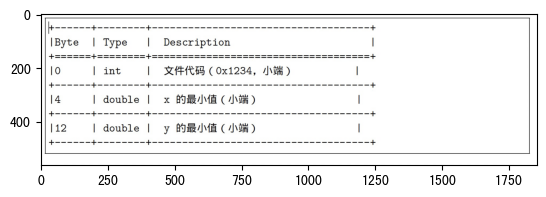

In [26]:
img = mpimg.imread('./imgs/py_cookbook_1.jpg')
plt.imshow(img)
plt.show()

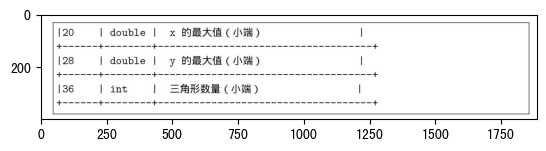

In [31]:
img = mpimg.imread('./imgs/py_cookbook_2.jpg')
plt.imshow(img)

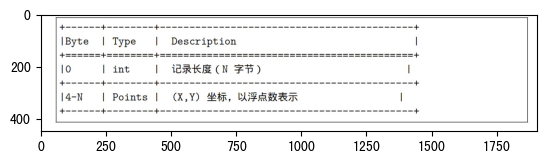

In [28]:
img = mpimg.imread('./imgs/py_cookbook_3.jpg')
plt.imshow(img)

In [32]:
# 开写
import struct
import itertools


def write_polys(filename, polys):
    # Determine bounding box
    flattened = list(itertools.chain(*polys))
    min_x = min(x for x, y in flattened)
    max_x = max(x for x, y in flattened)
    min_y = min(y for x, y in flattened)
    max_y = max(y for x, y in flattened)
    with open(filename, 'wb') as f:
        f.write(struct.pack('<iddddi', 0x12334, min_x, min_y, max_x, max_y, len(polys)))
        
        for poly in polys:
            size = len(poly) * struct.calcsize('<dd')
            f.write(struct.pack('<i', size+4))
            for pt in poly:
                f.write(struct.pack('<dd', *pt))

In [33]:
def read_polys(filename):
    with open(filename, 'rb') as f:
        # Read the header
        header = f.read(40)
        file_code, min_x, min_y, max_x, max_y, num_polys = struct.unpack('<iddddi', header)
        polys = []
        for n in range(num_polys):
            pbytes, = struct.unpack('<i', f.read(4))
            poly = []
            for m in range(pbytes // 16):
                pt = struct.unpack('<dd', f.read(16))
                poly.append(pt)
            polys.append(poly)
    return polys